<a href="https://colab.research.google.com/github/HwangJae-won/Data_project_practice/blob/main/0929_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Data Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df= pd.read_csv("/content/drive/MyDrive/데이터분석코테/Data/CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA & Data preprocessing

## 1. 결측치 확인&필요없는 변수 제외

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

결측치는 존재하지 않으며, 범주형 변수에 대한 처리 필요 & numerical 변수 분포 확인할 필요가 있어보임

<ipython-input-10-dad8e855bbdd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<Axes: >

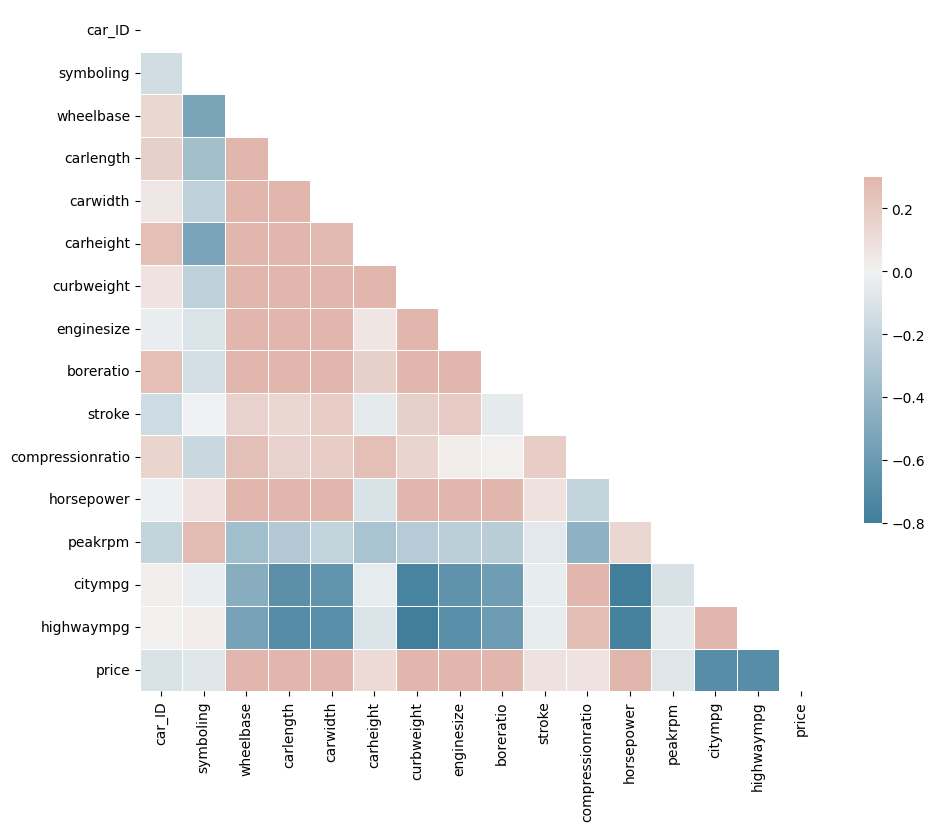

In [10]:
#상관관계 확인
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df.corr()
print(corr["price"].sort_values(ascending = False))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- target 변수와의 상관 계수의 절댓값이 작은 변수들은 target 변수와의 연관성은 낮음
  - car_ID             -0.109093
  - symboling          -0.079978
  - carheight           0.119336
  - stroke              0.079443
  - compressionratio    0.067984
  - peakrpm            -0.085267
- 이 중 car_ID 제외: 다른 변수들은 연관성은 낮지만 분석에 활용하려함, 연관성을 보여줄 뿐 인과관계를 명확히 설명해주지는 않기 때문

상관 관계 확인 끝냈으면 X,y 미리 분리해서 EDA 하자

In [45]:
#X, y 분리
X= df.drop(["price"], axis= 1)
y = df[["price"]]

In [46]:
#car_ID 제외 : target에 영향 X
X=X.drop(["car_ID"],axis=1)

## 2. 변수 타입 나눠서 세부 EDA

In [47]:
X.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [48]:
cat_idx = []
for i in X.columns:
  if X[i].dtype == "object":
    cat_idx.append(i)

In [49]:
#numerical variable col_name
num_idx = X.columns.difference(cat_idx)
num_idx=list(num_idx)

In [89]:
##columns 타입 하나씩 파악해서 리스트로 만들지 말자  # 너무 오래걸린다
# cat_idx = X.columns[[0,1,2,3,4,5,6,7,13,14,16]]
# num_idx = X.columns.difference(cat_idx)

### 3. categorical

In [50]:
X[cat_idx].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


door number, cylindernumber : 숫자 의미-> numerical 수치로 변환해줄 것. \
=> 차에 문이 몇개 있는지, 실린더가 차에 몇개 있는지를 의미-> 원핫 인코딩을 해줄 경우 0,1부터 시작되게 되므로 적절하지 않음

In [51]:
print(X['doornumber'].unique(), X['cylindernumber'].unique())

['two' 'four'] ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [52]:
X['doornumber'] = X['doornumber'].replace({'two': 2, 'four': 4})
X['cylindernumber'] = X['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

은근 중요한 포인트인데 놓친 것 같다.. 꼭 체크해두기

In [53]:
# CarName에서 첫 단어가 브랜드명이므로 브랜드명 추출 후 브랜드명 열 생성
X['Brand'] = X.CarName.str.extract('([A-Za-z]+)')
# CarName은 이제 필요없으므로 제거
X = X.drop(['CarName'], axis = 1)

아 .. 차 가격마다 같은 브랜드라도 가격이 천지 차이인데 이걸 묶어서 회사 변수를 만들어버리니까 성능이 더 떨어진듯 회사 변수를 추가하는 건 좋은 아이디어지만 그냥 빼는 건 아닌 것 같다. 변수를 추가하는 건 좋지만 바로바로 빼지는 말자

In [67]:
cat_idx.remove("CarName")

이제 나머지 categorical 변수들은 원핫 인코딩 진행하기에 무리 없어보임

### 4. Numerical Variable: 변수 생성, 조합, 분포 확인해볼 것

<Axes: ylabel='Count'>

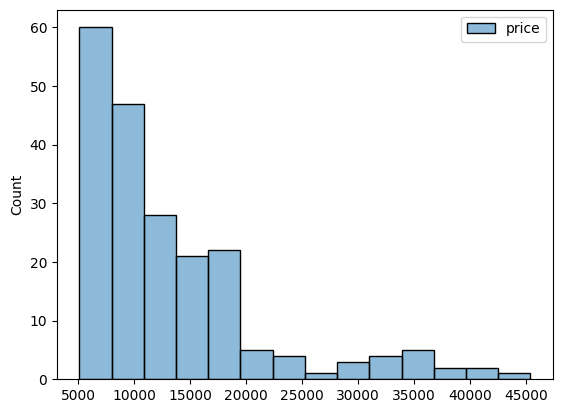

In [97]:
sns.histplot(y) #high variance

In [57]:
# carlength, carwidth, carheight를 통해 carvolume 열을 만듬
X['carvolume'] = X['carlength']*X['carwidth']*X['carheight']
num_idx.append('carvolume')

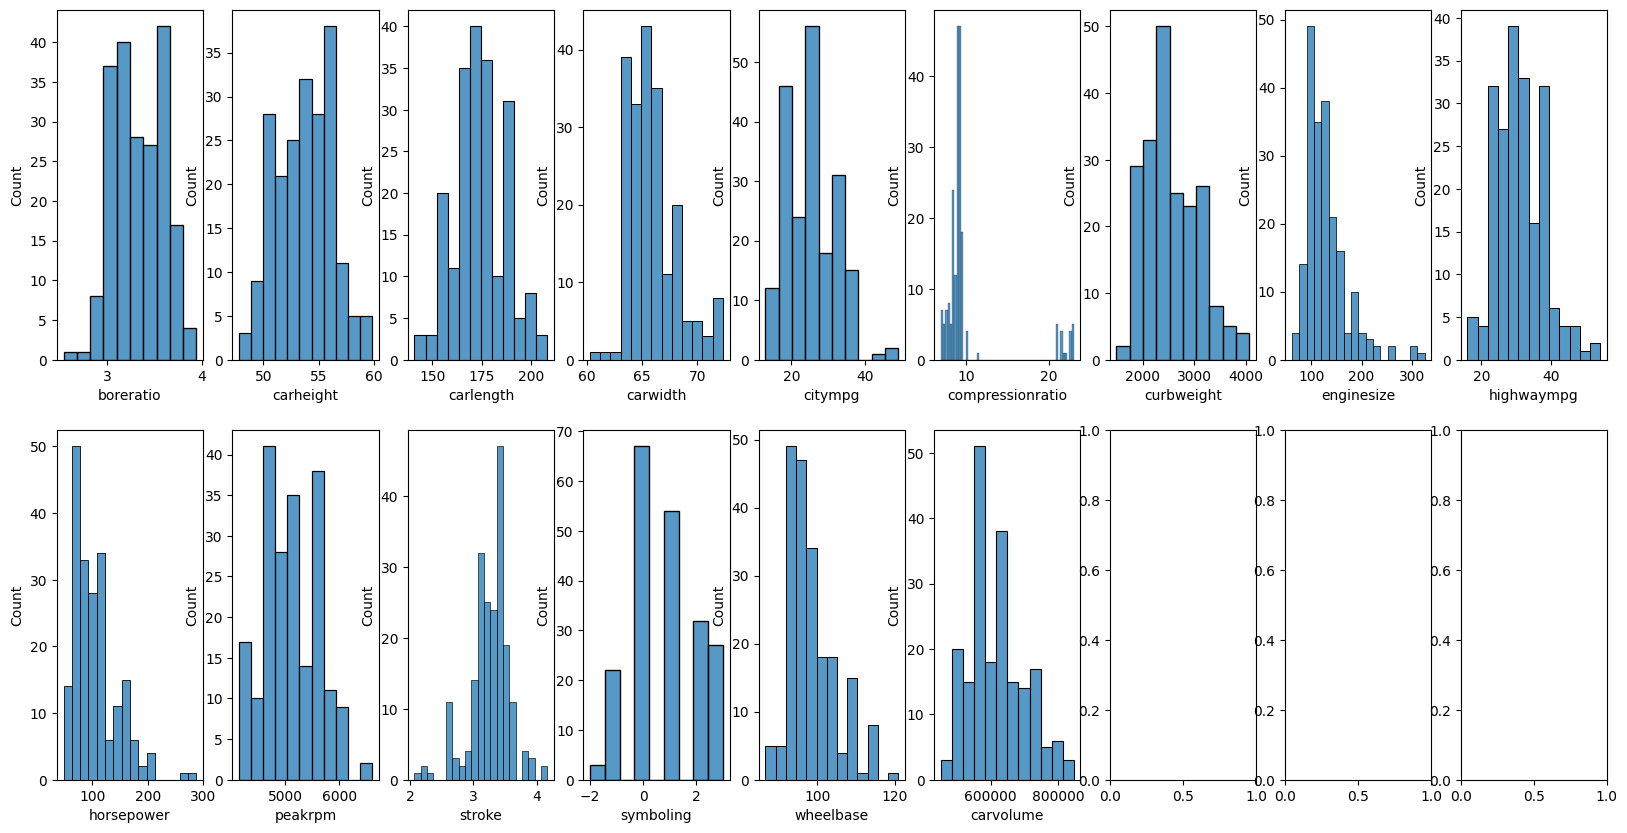

In [58]:
# 수치형 변수들의 분포를 알아봄
fig, ax = plt.subplots(nrows = 2, ncols = 9, figsize = (20, 10))
for i in range(len(num_idx)):
  if i <= 8:
    sns.histplot(X[num_idx[i]], ax = ax[0][i])
  else:
    sns.histplot(X[num_idx[i]], ax = ax[1][i - 9])
plt.show()

In [ ]:
#분포 확인 결과 범주를 나타내는 것 같음: symboling는 -3 ~3까지의 위험 비율을 점수화한 것
# 해당 변수는 스케일링 대상에서 제외

In [59]:
num_idx.remove("symboling")

In [60]:
cat_idx.append("symboling")

In [68]:
print(num_idx) ; print(cat_idx)

['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'wheelbase', 'carvolume']
['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'symboling']


In [77]:
#numerical variable col_name
num_idx = X.columns.difference(cat_idx)
num_idx=list(num_idx)

In [75]:
cat_idx = []
for i in X.columns:
  if X[i].dtype == "object":
    cat_idx.append(i)

In [62]:
#기본적인 전처리를 위한 라이브러리
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [64]:
t = [('cat', OneHotEncoder(handle_unknown = "ignore"), cat_idx), ('num', StandardScaler(), num_idx)]
col_transform = ColumnTransformer(transformers=t)

In [65]:
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem',
                                  'symboling']),
                                ('num', StandardScaler(),
                                 ['boreratio', 'carheight', 'carlength',
                                  'carwidth', 'citympg', 'compressionratio',
                                  'curbweight', 'enginesize', 'highwaympg',
                                  'horsepower', 'peakrpm', 'stroke',
                                  'wheelbase', 'carvolume'])])

In [79]:
X_std = col_transform.fit_transform(X)

# Modeling

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet

In [91]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [92]:
models = [LR,DTR,RFR,KNR,KNR,XGB]
result=[]
d = {}
for model in models:
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    rmse =np.sqrt(mean_squared_error(y_test, y_pred))
    print(model,":",rmse)
    result.append((model, rmse))

LinearRegression() : 3955.7914909488336
DecisionTreeRegressor() : 3955.7914909488336


<ipython-input-92-c74d8c1c78be>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor() : 3955.7914909488336
KNeighborsRegressor() : 3955.7914909488336
KNeighborsRegressor() : 3955.7914909488336
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 3955.7914909488336


In [94]:
result

[(LinearRegression(), 3955.7914909488336),
 (DecisionTreeRegressor(), 3955.7914909488336),
 (RandomForestRegressor(), 3955.7914909488336),
 (KNeighborsRegressor(), 3955.7914909488336),
 (KNeighborsRegressor(), 3955.7914909488336),
 (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
  395

===================================================

In [81]:
#Regressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
#튜닝 방법:grid
from sklearn.model_selection import GridSearchCV

In [83]:
#model 정의
models = {
    'RandomForest': (RandomForestRegressor(),
                 {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'LightGBM': (LGBMRegressor(),
                {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_child_samples':[5, 100],
                }),
    'GB': (GradientBoostingRegressor(),
                 {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'ExtraTree': (ExtraTreesRegressor(),
                  {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 })
}

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [85]:
model_results = []

# 모델별로 튜닝 및 적합
for model_name, (model, param_grid) in models.items():
    print(f"Start {model_name} Training!")
    search = GridSearchCV(model, param_grid, scoring='accuracy',  n_jobs=-1)
    search.fit(X_train, y_train)

    # 최적의 모델과 하이퍼파라미터 출력
    best_model =search.best_estimator_
    best_params =search.best_params_
    print(f"Best Parameters: {best_params}")

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"rmse: {rmse}\n")
    # 모델 이름과 accuracy 결과 저장
    model_results.append((model_name, rmse))

Start RandomForest Training!


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 50}
rmse: 2374.8240614033157

Start LightGBM Training!


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 46
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 50}
rmse: 2519.21206093328

Start ExtraTree Training!
Best Parameters: {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 50}
rmse: 3955.7914909488336



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [99]:
def train_regressor(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    r2 = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, mae
regressors = {
    "SVR": SVR(kernel='linear', C=1),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=5),
    "Ridge": Ridge(alpha=1.0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200,max_depth=3 ,random_state=2),
    "AdaBoostRegressor": AdaBoostRegressor(n_estimators=100, random_state=2),
    "BaggingRegressor": BaggingRegressor(n_estimators=100, random_state=2),
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, random_state=2),
    "GradientBoostingRegressor": GradientBoostingRegressor(learning_rate= 0.2,  min_samples_leaf= 4, min_samples_split= 5, n_estimators=100),
    "XGBRegressor": XGBRegressor(n_estimators=100, random_state=2)
}


In [101]:

# Lists to store metrics
algorithm_names = []
r2_scores = []
rmse_scores = []
mae_scores = []

# Train and evaluate each regressor
for name, regressor in regressors.items():
    r2, mse, mae = train_regressor(regressor, X_train, y_train, X_test, y_test)

    algorithm_names.append(name)
    r2_scores.append(r2)
    rmse_scores.append(np.sqrt(mse))
    mae_scores.append(mae)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'R2 Score': r2_scores,
    'Root Mean Squared Error': rmse_scores,
    'Mean Absolute Error': mae_scores
})

display(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-99-9d6df20704fb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1

,Algorithm,R2 Score,Root Mean Squared Error,Mean Absolute Error
0,SVR,0.104867,8406.270957,4857.802523
1,KNeighborsRegressor,0.716266,4732.770852,2691.269927
2,DecisionTreeRegressor,0.887491,2980.253615,2111.374123
3,Ridge,0.859006,3336.263190,2236.170340
4,RandomForestRegressor,0.942678,2127.254746,1595.631851
5,AdaBoostRegressor,0.914470,2598.474508,1998.553878
6,BaggingRegressor,0.959852,1780.284379,1224.609301
7,ExtraTreesRegressor,0.910141,2663.419924,1746.633000
8,GradientBoostingRegressor,0.926558,2407.863817,1629.112176
9,XGBRegressor,0.930350,2344.870091,1592.862644


In [86]:
model_results
#전처리 후 성능

[('RandomForest', 2374.8240614033157),
 ('LightGBM', 2677.3941939470697),
 ('GB', 2519.21206093328),
 ('ExtraTree', 3955.7914909488336)]

In [102]:
model_results
#전처리 전

[('RandomForest', 2345.575319201367),
 ('LightGBM', 2677.3941939470697),
 ('GB', 2504.5118237619504),
 ('ExtraTree', 3663.0715762112363)]

- 튜닝한 모델 중 가장 성능이 좋았던 RandomForest 모델 선정
- 최종 RMSE: 2345.57

In [96]:
result #튜닝 안한 기본 모델: 확실히 튜닝은 해야한다 !

[(LinearRegression(), 3955.7914909488336),
 (DecisionTreeRegressor(), 3955.7914909488336),
 (RandomForestRegressor(), 3955.7914909488336),
 (KNeighborsRegressor(), 3955.7914909488336),
 (KNeighborsRegressor(), 3955.7914909488336),
 (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
  395

- RF의 n_estimator를 50 ~100으로 잡으니 200까지 파라미터 탐색을 못해 best가 못 나왔음
- bagging regressor를 못해봄
- 튜닝은 필수+ 다양한 모델링 : 일단 쓰고 시작 (모델별 파라미터 공부해둘 것)